<a href="https://colab.research.google.com/github/seonae0223/Deep_Learning/blob/main/02_PyTorch_Dataset%2C_DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset, DataLoader
데이터를 처리하여 model에 공급(fit)하기 위하여 파이토치에서 torch.utils.data.Dataset과 torch.utils.data.DataLoader 클래스를 지원합니다.

- Dataset : feature와 label을 저장할 수 있습니다.
- DataLoader : Dataset을 모델에 공급할 수 있도록하는 클래스 입니다.

In [1]:
import torch
# torchvision : 파이토치 기반의 CV 도구들이 들어있는 패키지
# torchvision.dataset : Computer Vision 관련 예제 데이터 세트
from torchvision import datasets
from torchvision.transforms import ToTensor


In [2]:
train_data = datasets.FashionMNIST(
    root = "data", # 데이터(이미지)를 저장할 디렉토리
    train = True, # 훈련용 데이터 여부
    download = True, # 다운로드
    transform = ToTensor() # 이미지 반환. 여기서는 ndarray 형식의 이미지를 pytorch tensor로 변환
)

100%|██████████| 26421880/26421880 [00:00<00:00, 109131710.69it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 6864907.81it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 60323806.40it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16855797.81it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# Dataset 시각화

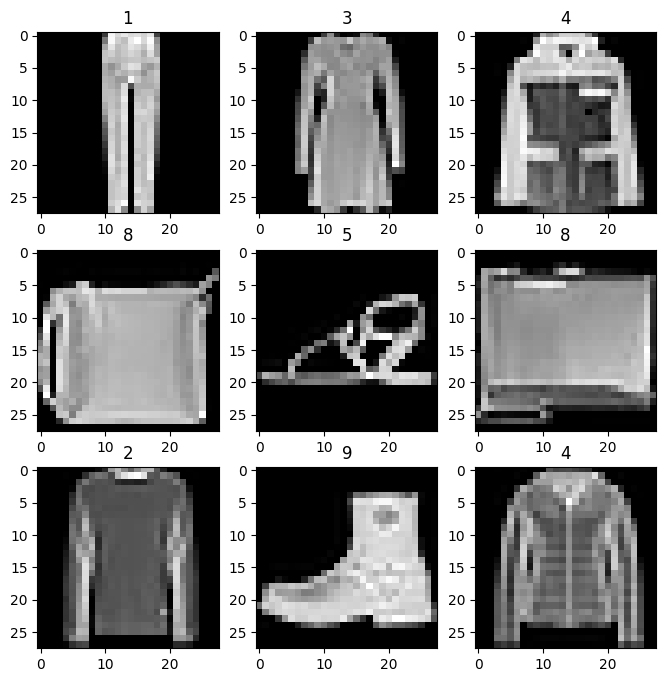

In [5]:
import matplotlib.pyplot as plt

labels_map = {
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle boot"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

# 1부터 9까지 총 9개의 이미지 출력
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item() # 인덱스이므로 size(1,)로 설정. item()이 없으면, tensor로 출력


  # Dataset에서 데이터를 뽑을 예정. 이 때 Dataset의 구조는 feature. target이 같이 들어있다.
  feature, target = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)

  plt.title(target)
  plt.imshow(feature.squeeze(), cmap='gray')

plt.show()

# DataLoader 만들기

In [25]:
BATCH_SIZE = 64

In [26]:
from torch.utils.data import DataLoader

# shuffle : 1에폭 당 데이터 로더에서 데이터를 읽어 올 때 마다 랜덤하게 섞게 된다.
# shuffle을 걸어주면 모델이 데이터를 조금 더 어렵게 학습한다.
train_dataloader = dataloader.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True) # 데이터를 train_data에서 가져오고, BATCH_SIZE로 배치 사이즈 설정.

In [27]:
# 테스트 데이터 불러오기
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

# 테스트 데이터 세트는 굳이 섞을 필요가 없다. 어차피 전ㄴ체 데이터에 대한 성능(loss, accuracy)를 확인만 하기 때문
test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle=True)

## DataLoader 시각화
- DataLoader 객체는 파이썬의 Generator 자료구조에 해당하며, Iterator를 직접 움직여 가면서 데이터를 Iterate 할 수 있습니다.
- 이 때 설정한 BATCH_SIZE 만큼 데이터를 추출해 냅니다.

In [34]:
# dataloader의 Iterator가 한 칸 움직일 때 마다(next) BATCH_SIZE만큼 데이터를 가져온다.
train_features, train_labels = next(iter(train_dataloader)) # dataloader를 iterator로 변환 후, 한 칸 옆으로(next) 가면, 0 데이터부터 출력
print(train_features.size())
print(train_labels.size())

torch.Size([64, 1, 28, 28])
torch.Size([64])


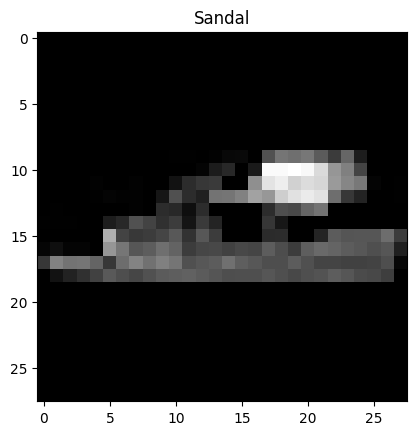

In [35]:
feature = train_features[0].squeeze()
label = train_labels[0].item()

plt.imshow(feature, cmap='gray')
plt.title(labels_map[label])
plt.show()

# ⭐CustomDataset
`torch.utils.data.Dataset` 클래스를 상속받으면 개발자가 직접 파이토치 Dataset을 구성할 수 있습니다. 필수로 오버라이딩 해야하는 메소드는 다음과 같습니다.
- `__init__` : 생성자 입니다. Dataset 에 담을 데이터, 전처리가 필요하다면 `transform` 객체를 같이 받습니다.
- `__len__` : Dataset에 있는 데이터의 개수
- `__getitem__` : 몇 번째 데이터를 가져올지를 정의하는 함수입니다. 만약 `transform`이 있다면 변환 처리까지 해주게 됩니다.

In [70]:
class CustomDataset(torch.utils.data.Dataset):

  def __init__(self, features, transform=None):
    self.features = features
    self.transform = transform
    self.len = features.shape[0] # 항상 shape의 첫 번째에는 데이터의 전체 개수가 들어있다.

  def __len__(self):
    # __len__ 메소드는 len() 함수를 호출 했을 때 자동으로 실행되는 매직 메소드
    #print("__len__ called")
    return self.len

  def __getitem__(self, idx):
    # __getitem__ 메소드는  [ ] 기호를 이용해서 아이템을 뽑아낼 때 호출되는 매직 메소드(연산자 오버로딩)

    #print("__getitem__ called")
    feature = self.features[idx]

    if self.transform:
      feature = self.transform(feature)

    return feature

In [71]:
# 사용자 정의 데이터 변환기(transform) 만들기
def square(data):
  # 데이터를 제곱하는 데이터 변환기
  return data ** 2

In [72]:
# 개발자가 직접 만든 함수를 파이토치의 변환기로 등록
import torchvision.transforms as tr
transform = tr.Compose([square])
transform

Compose(
    <function square at 0x7985df6c6b90>
)

In [73]:
import numpy as np

sample_data = np.arange(10)
custom_ds = CustomDataset(sample_data, transform=transform)

In [74]:
len(custom_ds)

10

In [75]:
custom_ds[4]

16

In [76]:
custom_dl = DataLoader(custom_ds, batch_size=2, shuffle=True)

In [77]:
for _ in range(5):
  for data in custom_dl:
    # data loader에서 데이터를 뽑으면 dataset에 적용된 transform이 실행되서 뽑힌다.
    print(data)

  print('='*20)

tensor([16, 25])
tensor([49, 64])
tensor([0, 9])
tensor([81, 36])
tensor([4, 1])
tensor([64, 49])
tensor([ 0, 36])
tensor([ 4, 25])
tensor([1, 9])
tensor([16, 81])
tensor([16, 49])
tensor([25,  1])
tensor([81, 64])
tensor([0, 9])
tensor([ 4, 36])
tensor([ 1, 49])
tensor([16,  9])
tensor([ 4, 81])
tensor([36, 64])
tensor([ 0, 25])
tensor([25,  0])
tensor([64,  1])
tensor([49, 81])
tensor([ 9, 36])
tensor([16,  4])
